In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from overviews import prop_results_dict, reaction_results_dict, application_results_dict
from gptchem_llama import plotting

Matplotlib parameters: activated


In [2]:
def calculate_llm_performance(result_dic, relative_improvement = True):
    llms = [acc for model, acc in result_dic.items() if model in ['GPTJ', 'Llama', 'Mistral']]
    trads = [acc for model, acc in result_dic.items() if model not in ['GPTJ', 'Llama', 'Mistral']]

    max_llm = max(llms)
    max_trad = max(trads)

    print(f"max LLM: {max_llm}")
    print(f"max tradional: {max_trad}")
    
    if max_llm == 0 or max_trad == 0:
        return 'N/A'
    
    rel_improvement = round(((max_llm-max_trad)/ max_trad) * 100, 1)
    abs_improvement = round((max_llm-max_trad) * 100, 1)
    try:
        
        if relative_improvement:
            improvement = rel_improvement
        else:
            improvement = abs_improvement
        if improvement > 0:
            improvement = f'+{improvement}%'
        else:
            improvement = f'{improvement}%'
    except:
        rel_improvement = 'N/A'
    print(f"Absolute Improvement: {abs_improvement}")
    print(f"Relative Improvement: {rel_improvement}")
    return improvement

In [3]:
COLOR_DICT = {'GPTJ': '#0C5DA5',
            'Llama': '#00B945',
            'Mistral': '#FF9500',
            'RF': 'silver',
            'XGBoost': 'darkgray',
            'In House': 'dimgrey'}

EXCLUDE = ['Isomerization', 'Sq. r\nof gyration\n(Monomers)']
OFFSET = 0.005

def add_averages(ax, res_dict):
    models = COLOR_DICT.keys()

    averages = {}
    for model in models:
        if model == 'In House':
            continue
        av = [res['results'][model] for res in res_dict.values() if model in res['results'].keys()]
        av = [ i for i in av if i>0]
        averages.update({model:av})
        average_model = sum(av) /len(av)
        ax.axhline(average_model, color = COLOR_DICT[model], linestyle = '--', alpha = 0.4)

def plot_all(ax, results_dict, add_table = True, table_offset = -0.6):
    results_dict = {dataset:res for dataset, res in results_dict.items() if dataset not in EXCLUDE}

    table_values = {'Epochs' : [],
                    'Size' : [],
                    'Best model': [],
                    'LLM performance': []}

    model_used = []
    for i, (dataset, data) in enumerate(results_dict.items()):
        print(dataset)

        for model, acc in data['results'].items():
            model_used.append(model)
            if model in ['Llama', 'GPTJ', 'Mistral']:
                j = OFFSET
            else:
                j = -OFFSET
            ax.scatter(i+j, acc, color = COLOR_DICT[model], alpha=0.7, s= 50)

        table_values['Epochs'].append(data['epochs'])
        table_values['Size'].append(data['size'])

        best_model = max(data['results'], key=data['results'].get)
        table_values['Best model'].append(best_model)

        table_values['LLM performance'].append(calculate_llm_performance(result_dic=data['results']))

    ax.set_xticks(range(len(results_dict)))
    ax.set_xticklabels(labels=results_dict.keys(), rotation = 45)

    ax.set_yticks([0.5, 0.75, 1])
    ax.set_ylim(0.45, 1.05)
    ax.axhline(0.5, linestyle = '--', color = 'gray', alpha = 0.5)

    ax.set_ylabel('Accuracy / %')

    xlabel = ax.xaxis.label  # Get the x-axis label text object
    font_size = xlabel.get_size()  # Get the font size
    print("X-axis label font size:", font_size)

    if add_table:
        table_data = list(table_values.values())
        table = ax.table(cellText=table_data,
                        rowLabels= list(table_values.keys()),
                        cellLoc='center',
                        loc='bottom',
                        bbox=[0, table_offset, 1, 0.3])
        
        for i, model in enumerate(table_values['Best model']):
            c = COLOR_DICT[model]
            table[(2, i)].set_facecolor(c)
            table[(2, i)].set_alpha(0.3)
            table[(2, i)].get_text().set_color(c)
            
        for key, cell in table.get_celld().items():
            cell.set_edgecolor('black')  # Set the border color to black
            cell.set_linewidth(1) 

        table.auto_set_font_size(False) 
        table.set_fontsize(10)

        for row in range(len(table_values.keys())):
            row_label_cell = table[(row, -1)]
            #row_label_cell.get_text().set_color('black')
            row_label_cell.get_text().set_fontsize(11)
            
    model_used = list(set(model_used))
    plt.legend(handles= [plt.plot(0,0, color = color, linestyle = '', marker = 'o', markersize = 7.5, alpha = 0.7)[0] for model, color in  COLOR_DICT.items() if model in model_used ],
            labels=COLOR_DICT.keys(),
            loc="center left",
            bbox_to_anchor=(1, 0.5))
    return ax

10
Adhesive Energy
max LLM: 0.96
max tradional: 0.94
Absolute Improvement: 2.0
Relative Improvement: 2.1
Density
(Monomers)
max LLM: 0.88
max tradional: 0.76
Absolute Improvement: 12.0
Relative Improvement: 15.8
Coh. E
(Monomers)
max LLM: 0.78
max tradional: 0.7
Absolute Improvement: 8.0
Relative Improvement: 11.4
$T_{g}$
(Monomers)
max LLM: 0.84
max tradional: 0.8
Absolute Improvement: 4.0
Relative Improvement: 5.0
Melting Point
(Molecules)
max LLM: 0.686
max tradional: 0.68
Absolute Improvement: 0.6
Relative Improvement: 0.9
Dyn. Viscosity
max LLM: 0.8
max tradional: 0.8
Absolute Improvement: 0.0
Relative Improvement: 0.0
Grain Size
(Mg alloys)
max LLM: 0.94
max tradional: 0.953
Absolute Improvement: -1.3
Relative Improvement: -1.4
LPS Propensity
(Proteins)
max LLM: 0.95
max tradional: 0.895
Absolute Improvement: 5.5
Relative Improvement: 6.1
Structure
(NPs)
max LLM: 0.967
max tradional: 0.958
Absolute Improvement: 0.9
Relative Improvement: 0.9
Melting Point
(TAGs)
max LLM: 0.92
max 

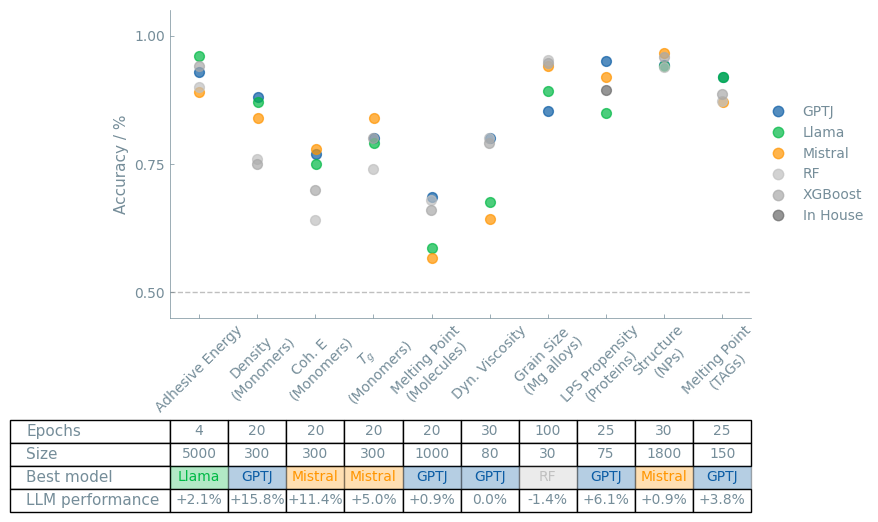

In [10]:
prop_results_dict = {dataset: a for dataset, a in prop_results_dict.items() if dataset not in EXCLUDE}
print(len(prop_results_dict))
fig, ax = plt.subplots(1,1, figsize = (0.75*len(prop_results_dict), 4))

ax = plot_all(ax, prop_results_dict, add_table=True, table_offset=-0.63)
#add_averages(ax=ax, res_dict=prop_results_dict)
ax.set_xlim(-0.5, 9.5)
fig.savefig('Overview_all_properties.pdf', bbox_inches='tight')

Click
reaction
max LLM: 0.94
max tradional: 0.913
Absolute Improvement: 2.7
Relative Improvement: 3.0
Nickel
Catalysis
max LLM: 0.88
max tradional: 0.0
Kinetics
(Polymers)
max LLM: 0.8348
max tradional: 0.0
${H_{2}O}$ Splitting
(HER) (MOFs)
max LLM: 0.92
max tradional: 0.0
${CO_{2}}$ conversion
(MOFs)
max LLM: 0.68
max tradional: 0.6
Absolute Improvement: 8.0
Relative Improvement: 13.3
MOF Synthesis
max LLM: 1.0
max tradional: 1.0
Absolute Improvement: 0.0
Relative Improvement: 0.0
X-axis label font size: 11.0


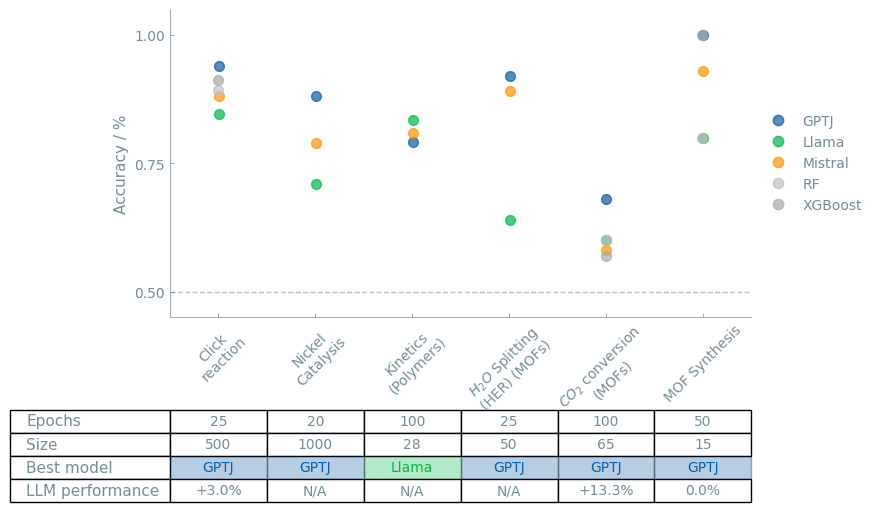

In [5]:
fig, ax = plt.subplots(1,1, figsize = (0.75*len(prop_results_dict), 4))

ax = plot_all(ax , reaction_results_dict)
ax.set_xlim(-0.5, 5.5)

#add_averages(ax=ax, res_dict=reaction_results_dict)
fig.savefig('Overview_all_reactions.pdf', bbox_inches='tight')

He Diffusion
(MOFs)
max LLM: 0.726
max tradional: 0.766
Absolute Improvement: -4.0
Relative Improvement: -5.2
H-Storage
(Metal Hydrides)
max LLM: 0.86
max tradional: 0.0
${CO_{2}}$ adsorption
(Biomass)
max LLM: 0.759
max tradional: 0.733
Absolute Improvement: 2.6
Relative Improvement: 3.5
Thermal
Desalination
max LLM: 0.867
max tradional: 1.0
Absolute Improvement: -13.3
Relative Improvement: -13.3
Detection Response
(Gas Sensors)
max LLM: 0.894
max tradional: 0.9
Absolute Improvement: -0.6
Relative Improvement: -0.7
Stability
(Gas Sensors)
max LLM: 0.708
max tradional: 0.675
Absolute Improvement: 3.3
Relative Improvement: 4.9
Gasification
(Biomass)
max LLM: 0.775
max tradional: 0.867
Absolute Improvement: -9.2
Relative Improvement: -10.6
X-axis label font size: 11.0


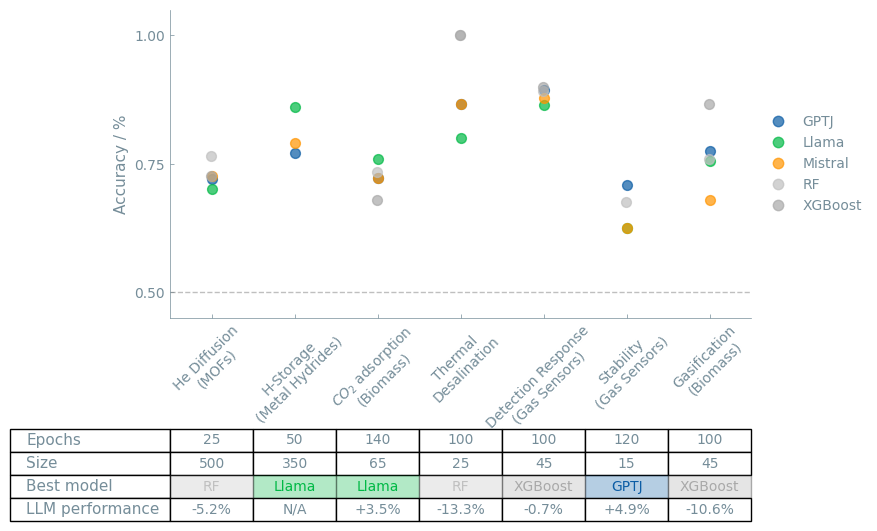

In [6]:
fig, ax = plt.subplots(1,1, figsize = (0.75*len(prop_results_dict), 4))

ax = plot_all(ax , application_results_dict, table_offset=-0.66)
ax.set_xlim(-0.5, 6.5)

#add_averages(ax=ax, res_dict=application_results_dict)
fig.savefig('Overview_all_applications.pdf', bbox_inches='tight')

[0.93, 0.88, 0.77, 0.8, 0.686, 0.8, 0.853, 0.95, 0.943, 0.92, 0.94, 0.88, 0.7913, 0.92, 0.68, 1.0, 0.72, 0.77, 0.722, 0.867, 0.894, 0.708, 0.775]
['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e', '#9A607F']
[0.96, 0.87, 0.75, 0.79, 0.586, 0.675, 0.893, 0.85, 0.94, 0.92, 0.846, 0.71, 0.8348, 0.64, 0.6, 0.8, 0.7, 0.86, 0.759, 0.8, 0.864, 0.625, 0.756]
['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e', '#9A607F']
[0.89, 0.84, 0.78, 0.84, 0.566, 0.642, 0.94, 0.92, 0.967, 0.87, 0.88, 0.79, 0.8087, 0.89, 0.58, 0.93, 0.726, 0.79, 0.722, 0.867, 0.879, 0.625, 0.68]
['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e', '#9A607F']


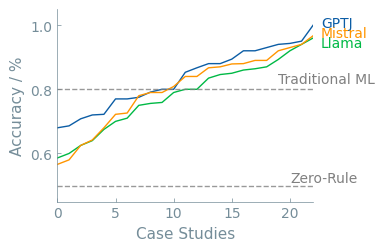

In [7]:
fig, ax = plt.subplots(1,1)

def plot_accuracies(ax, 
                    model = 'GPTJ', 
                    limit = 0.75,
                    limit_perc = False
                    ):
    all = {**prop_results_dict, **reaction_results_dict, **application_results_dict}

    accs = [v['results'][model] for k,v in all.items() if v['results'][model] > 0.52 and model in v['results'].keys()]
    print(accs)
    accs.sort()
    models = ['GPTJ','Llama','Mistral'] #'RF', 'XGBoost']
    index = models.index(model)
    print(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    c = plt.rcParams['axes.prop_cycle'].by_key()['color'][index]

    ax.plot(accs, label = model, c = COLOR_DICT[model])

    if limit_perc:
        for i,a in enumerate(accs):
            if a >= limit:
                break
        ax.axvline(i, 0,a , color = c, linestyle = '--')
        percentaga = round(100 * (1-i/len(accs)), 2)
        print(percentaga)

        ax.text(i, 1, f'{percentaga} %')

    return ax

ax  =plot_accuracies(ax, model = 'GPTJ')
ax  =plot_accuracies(ax, model = 'Llama')
ax  =plot_accuracies(ax, model = 'Mistral')
#ax  =plot_accuracies(ax, model = 'XGBoost')
#ax  =plot_accuracies(ax, model = 'RF')



res = {**prop_results_dict, **reaction_results_dict, **application_results_dict}

accs_RF = [v['results']['RF'] for k,v in res.items() if v['results']['RF'] > 0.5 and 'RF' in v['results'].keys()]
average_RF = sum(accs_RF) /len(accs_RF)

accs_XGB = [v['results']['XGBoost'] for k,v in res.items() if v['results']['XGBoost'] > 0.5 and 'XGBoost' in v['results'].keys()]
average_XGB = sum(accs_XGB) /len(accs_XGB)

limit = average_RF
ax.axhline(limit, linestyle = '--', c = 'gray', alpha = 0.8)
ax.text(19,0.82, 'Traditional ML', c = 'gray')

import matplotx
matplotx.line_labels(ax)
ax.set_ylim(0.45,1.05 )

#Zero rule
ax.axhline(0.5, 0, 25, linestyle = '--', color = 'gray', alpha = 0.8)
ax.text(20,0.51, 'Zero-Rule', c = 'gray')

plt.xlabel('Case Studies')
plt.ylabel('Accuracy / %')
fig.savefig('Overview_accuries_models.pdf', bbox_inches = 'tight')

[0.93, 0.88, 0.77, 0.8, 0.686, 0.8, 0.853, 0.95, 0.943, 0.92, 0.94, 0.88, 0.44, 0.7913, 0.92, 0.68, 1.0, 0.72, 0.77, 0.722, 0.867, 0.894, 0.708, 0.775]
[0.96, 0.87, 0.75, 0.79, 0.586, 0.675, 0.893, 0.85, 0.94, 0.92, 0.846, 0.71, 0.5, 0.8348, 0.64, 0.6, 0.8, 0.7, 0.86, 0.759, 0.8, 0.864, 0.625, 0.756]
[0.89, 0.84, 0.78, 0.84, 0.566, 0.642, 0.94, 0.92, 0.967, 0.87, 0.88, 0.79, 0.5, 0.8087, 0.89, 0.58, 0.93, 0.726, 0.79, 0.722, 0.867, 0.879, 0.625, 0.68]
[0.94, 0.75, 0.7, 0.8, 0.66, 0.79, 0.947, 0.958, 0.886, 0.913, 0.57, 1.0, 0.726, 0.68, 1.0, 0.9, 0.3, 0.867]


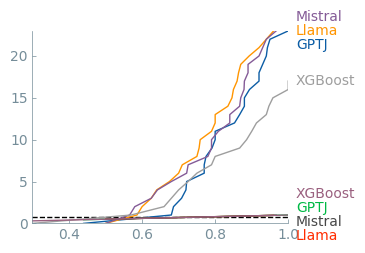

In [8]:
def plot_accuracies_horizontal(ax, 
                    results:dict, 
                    model = 'GPTJ', 
                    limit = 0.75
                    ):
    all = results

    accs = [v['results'][model] for k,v in all.items() if v['results'][model] > 0 and model in v['results'].keys()]
    print(accs)
    accs.sort()

    models = ['GPTJ', 'Llama', 'Mistral', 'RF', 'XGBoost']
    index = models.index(model)
    c = plt.rcParams['axes.prop_cycle'].by_key()['color'][index]

    ys = [i for i in enumerate(accs)]
    ax.plot(accs, ys, label = model)

    return ax
    for i,a in enumerate(accs):
        if a >= limit:
            break
    ax.axvline(i, 0,a , color = c, linestyle = '--')
    percentaga = round(100 * (1-i/len(accs)), 2)
    print(percentaga)

    ax.text(i, 1, f'{percentaga} %')

    return ax

fig, ax = plt.subplots(1,1)

limit = 0.75
ax.axhline(limit, linestyle = '--', c = 'k')

res = {**prop_results_dict, **reaction_results_dict, **application_results_dict}

ax  =plot_accuracies_horizontal(ax,results=res, model = 'GPTJ')
ax  =plot_accuracies_horizontal(ax, res,model = 'Llama')
ax  =plot_accuracies_horizontal(ax, res,model = 'Mistral')
ax  =plot_accuracies_horizontal(ax, res,model = 'XGBoost')

import matplotx
matplotx.line_labels(ax)
